In [1]:
! pip install mlxtend

In [2]:
! pip install conda

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
data=pd.read_csv('my_movies.csv')

In [4]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [6]:
data1=data.copy()

In [8]:
data1=pd.get_dummies(data1)

In [9]:
data1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


#### By using Apriori algorithm

In [10]:
freqitem=apriori(data1, min_support=0.1, use_colnames=True )

In [11]:
freqitem

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr..."
1393,0.1,"(V5_LOTR2, Sixth Sense, V3_Harry Potter1, Gree..."
1394,0.1,"(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr..."
1395,0.1,"(Harry Potter1, V5_LOTR2, V3_Harry Potter1, Gr..."


In [12]:
fi = freqitem

#### Building rule with 70% confidence

In [13]:
rule1=association_rules(fi, metric="confidence", min_threshold=0.7)

In [14]:
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(V1_Sixth Sense, LOTR2)","(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(V1_Sixth Sense, LOTR1)","(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V5_LOTR2),"(Harry Potter1, Sixth Sense, V3_Harry Potter1,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V3_Harry Potter1),"(Harry Potter1, V5_LOTR2, Sixth Sense, Green M...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [15]:
rule2=association_rules(fi, metric="lift", min_threshold=0.7 )

In [16]:
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(V2_LOTR1),"(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V4_Green Mile),"(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(V1_Sixth Sense),"(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(LOTR2),"(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [17]:
rule2.sort_values('lift', ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Green Mile, V3_Harry Potter1, Harry Potter1, ...","(Sixth Sense, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(V2_LOTR1, V4_Green Mile, LOTR1)","(Sixth Sense, Harry Potter1, V5_LOTR2, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(Harry Potter1, V2_LOTR1, LOTR2)","(Sixth Sense, V4_Green Mile, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(Harry Potter1, V2_LOTR1, LOTR1)","(Sixth Sense, V4_Green Mile, V5_LOTR2, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(Harry Potter1, V4_Green Mile, LOTR2)","(Sixth Sense, V2_LOTR1, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(Harry Potter1, V4_Green Mile, LOTR1)","(Sixth Sense, V2_LOTR1, V5_LOTR2, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(Harry Potter1, LOTR2, LOTR1)","(Sixth Sense, V2_LOTR1, V5_LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(Sixth Sense, V2_LOTR1, V5_LOTR2)","(Harry Potter1, V4_Green Mile, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(Sixth Sense, V4_Green Mile, V5_LOTR2)","(Harry Potter1, V2_LOTR1, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(Sixth Sense, V5_LOTR2, LOTR2)","(V4_Green Mile, Harry Potter1, V2_LOTR1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [18]:
rule2[rule2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(V2_LOTR1),"(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V4_Green Mile),"(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(V1_Sixth Sense),"(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(LOTR2),"(Harry Potter1, V5_LOTR2, Sixth Sense, V3_Harr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


#### ploting confidence vs support

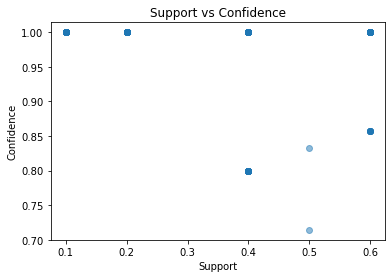

In [19]:
plt.scatter(rule1['support'],rule1['confidence'], alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

#### plotting lift vs support

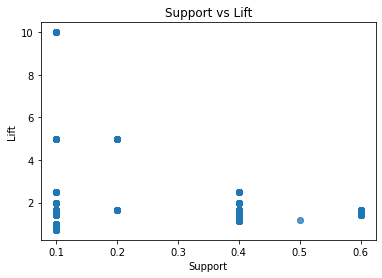

In [20]:
plt.scatter(rule2['support'],rule2['lift'], alpha=0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("Lift")
plt.show()

#### By using 0.2 support value and 50% confidence

In [22]:
freqitem1=apriori(data1, min_support=0.2, use_colnames=True )
freqitem1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Gladiator, Sixth Sense, V3_Sixth Sense, Patri..."
77,0.4,"(Gladiator, Sixth Sense, V3_Sixth Sense, V2_Pa..."
78,0.4,"(Sixth Sense, V3_Sixth Sense, Patriot, V2_Patr..."
79,0.4,"(Gladiator, V3_Sixth Sense, Patriot, V2_Patrio..."


In [23]:
fi1 = freqitem1

In [24]:
rule3=association_rules(fi1, metric="confidence", min_threshold=0.5)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
642,(Sixth Sense),"(Gladiator, V3_Sixth Sense, Patriot, V2_Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
643,(V3_Sixth Sense),"(Gladiator, Sixth Sense, Patriot, V2_Patriot, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
644,(Patriot),"(Gladiator, Sixth Sense, V3_Sixth Sense, V2_Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
645,(V2_Patriot),"(Gladiator, Sixth Sense, V3_Sixth Sense, Patri...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [25]:
rule4=association_rules(fi1, metric="lift", min_threshold=0.5)
rule4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(Sixth Sense),"(Gladiator, V3_Sixth Sense, Patriot, V2_Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(V3_Sixth Sense),"(Gladiator, Sixth Sense, Patriot, V2_Patriot, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
651,(Patriot),"(Gladiator, Sixth Sense, V3_Sixth Sense, V2_Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(V2_Patriot),"(Gladiator, Sixth Sense, V3_Sixth Sense, Patri...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


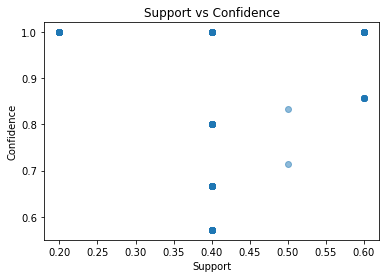

In [26]:
plt.scatter(rule3['support'],rule3['confidence'], alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

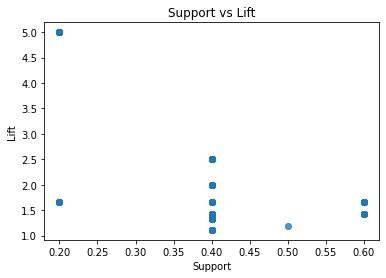

In [27]:
plt.scatter(rule4['support'],rule4['lift'], alpha=0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("Lift")
plt.show()